https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [3]:
ruta_data_train='./DataSetClasificacion/train.csv'
ruta_data_test='./DataSetClasificacion/test.csv'

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv(ruta_data_train)
df_test = pd.read_csv(ruta_data_test)
df_train.head(5)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df_test.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

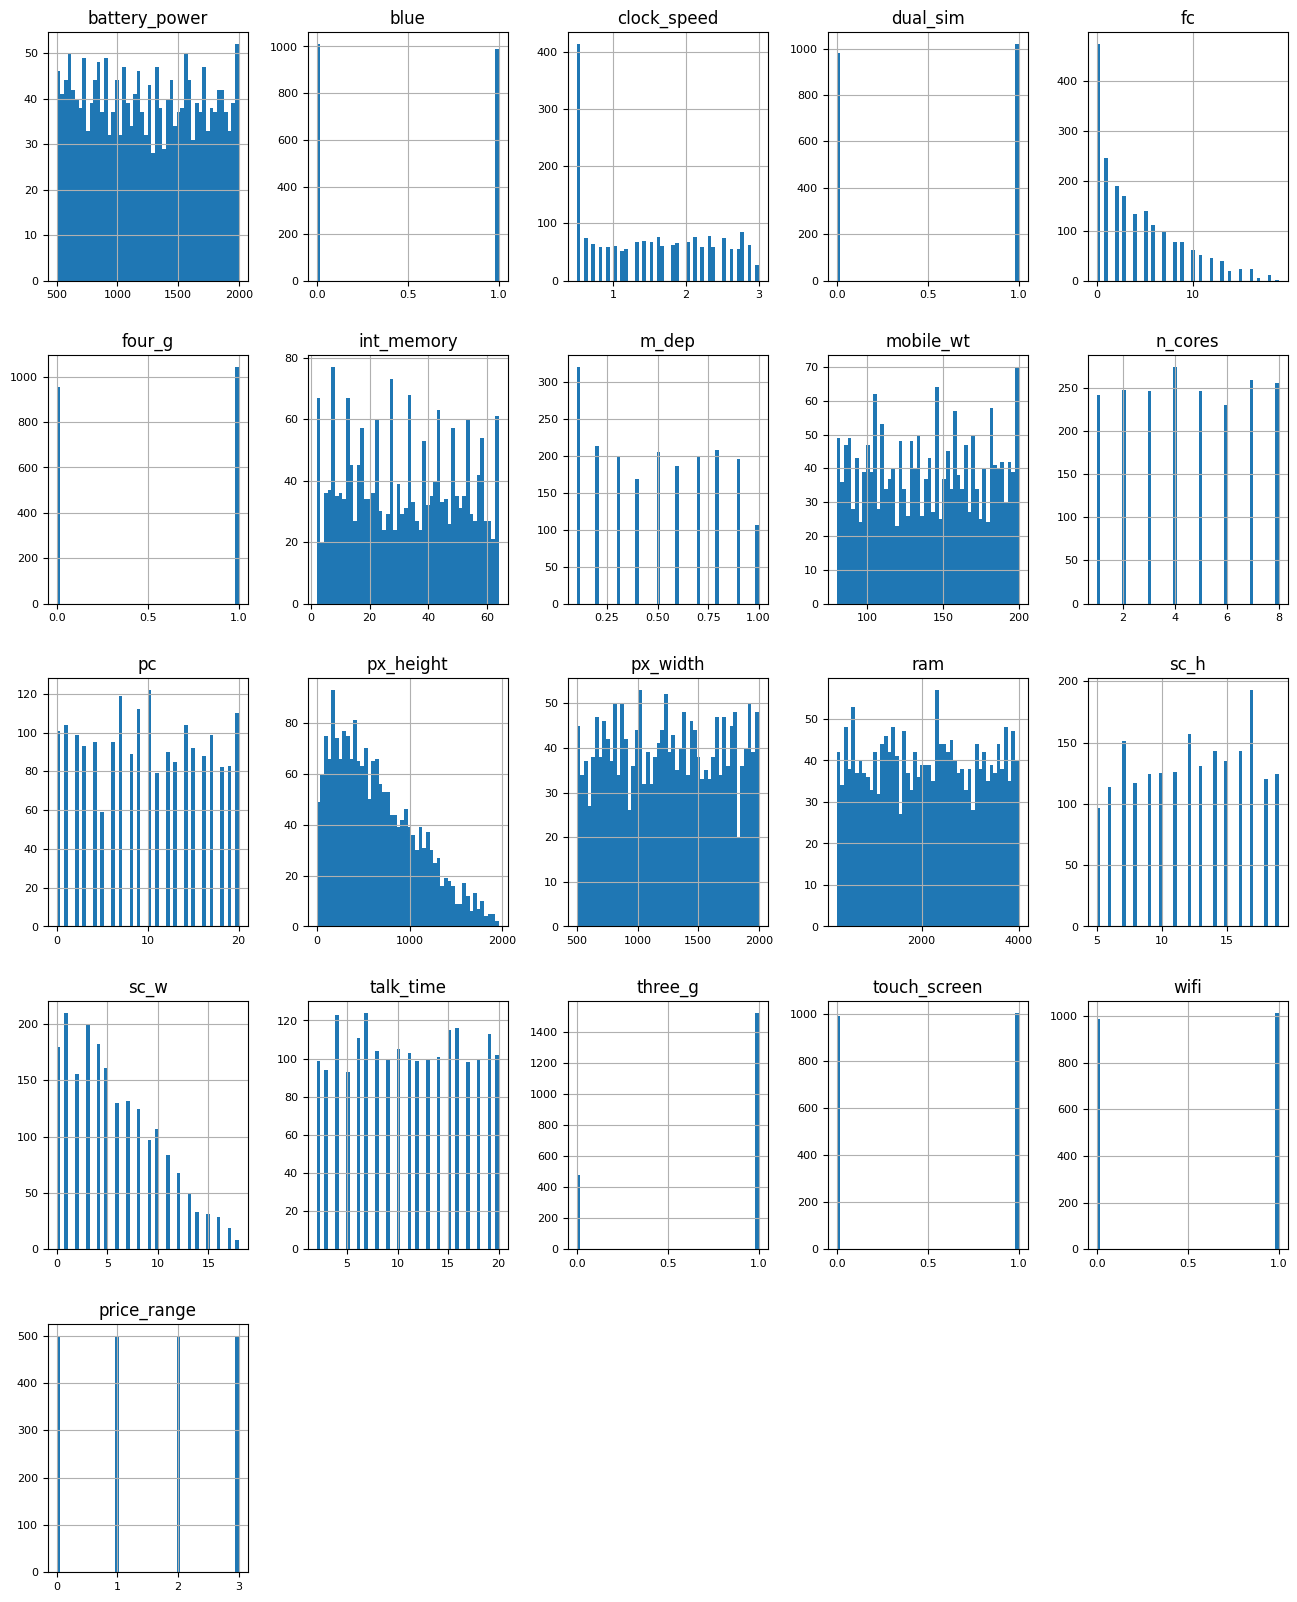

In [9]:
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Normalizar Datos de Train

In [11]:
from sklearn.preprocessing import  MinMaxScaler
# Inicializar el codificador MinMaxScaler
scaler = MinMaxScaler()

# Lista de nombres de columnas numéricas
colum_num = ['battery_power', 'clock_speed', 'fc','int_memory','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']  # Puedes agregar las columnas numéricas que necesites normalizar

# Normalizar las columnas numéricas
df_train[colum_num] = scaler.fit_transform(df_train[colum_num])

In [12]:
df_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.6,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1,1
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.7,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0,2
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.9,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.8,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,2
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.6,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0,1


array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

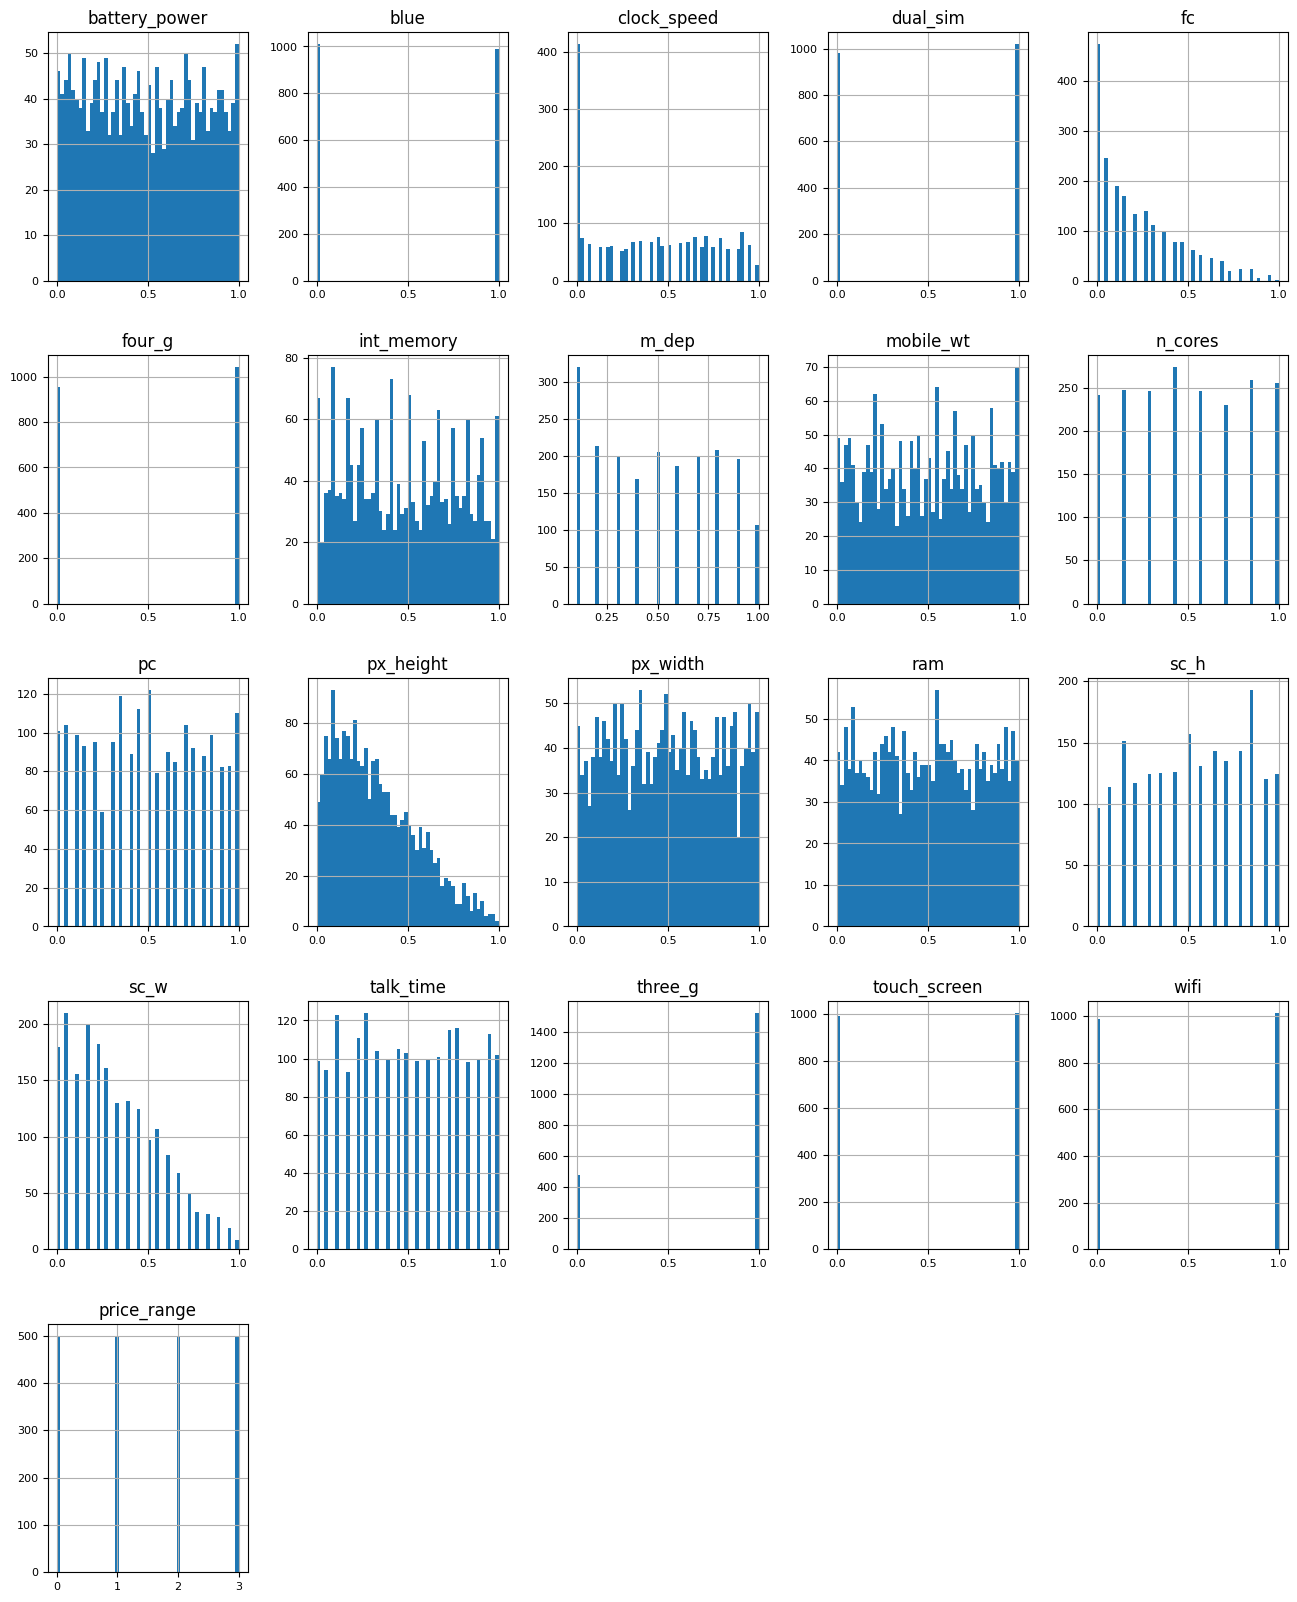

In [13]:
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [15]:
X = df_train.drop(columns='price_range')
y = df_train['price_range']

In [16]:
# División del conjutno de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42 )

print('Conjunto de datos de entrada de entrenamiento', X_train.shape)
print('Conjunto de datos de salida de entrenamiento', y_train.shape)

print('Conjunto de datos de entrada de prueba', X_test.shape)
print('Conjunto de datos de salida de prueba', y_test.shape)

Conjunto de datos de entrada de entrenamiento (1600, 20)
Conjunto de datos de salida de entrenamiento (1600,)
Conjunto de datos de entrada de prueba (400, 20)
Conjunto de datos de salida de prueba (400,)


SVM primero visualizacion T_SNE

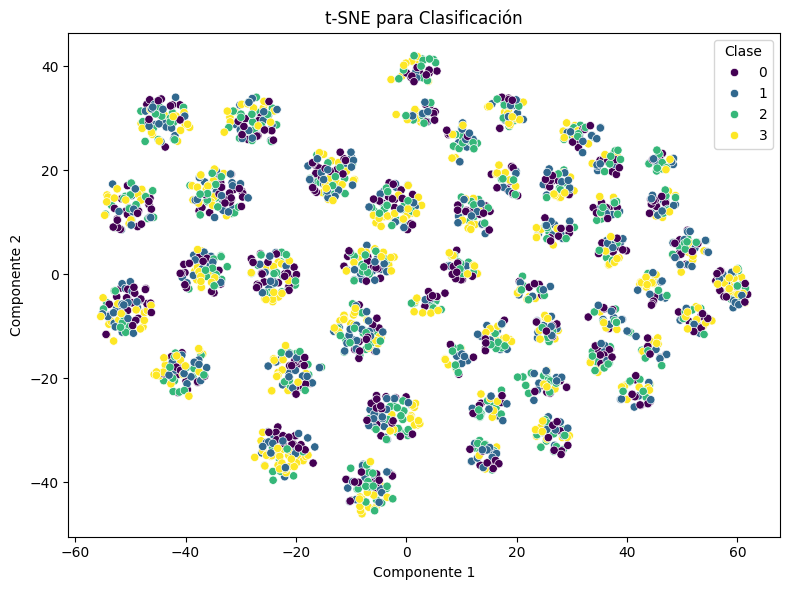

In [19]:
# Aplicar t-SNE para reducir la dimensionalidad de las características en un problema de clasificación
tsne_cla = TSNE(n_components=2, random_state=42)
X_tsne_cla = tsne_cla.fit_transform(X)  # X es tu conjunto de datos de características

# Visualizar los resultados para clasificación
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne_cla[:, 0], y=X_tsne_cla[:, 1], hue=y, palette='viridis')
plt.title('t-SNE para Clasificación')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Clase')
plt.tight_layout()
plt.show()

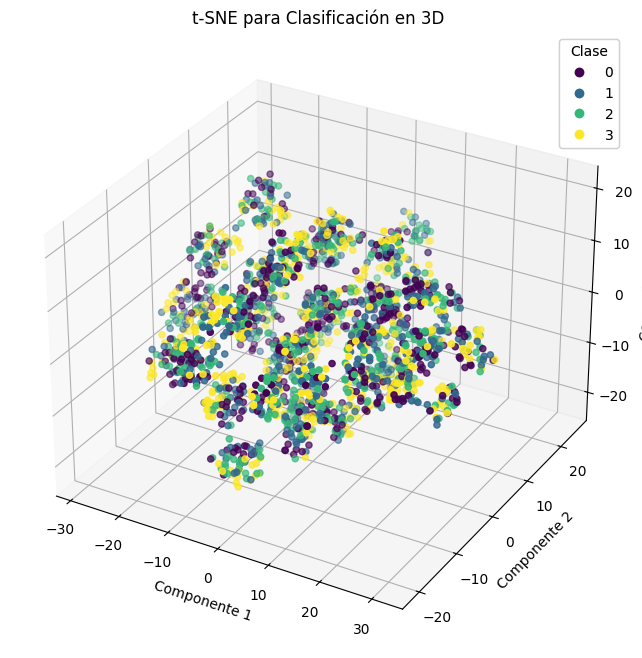

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Aplicar t-SNE para reducir la dimensionalidad de las características en un problema de clasificación
tsne_cla = TSNE(n_components=3, random_state=42)
X_tsne_cla = tsne_cla.fit_transform(X)  # X es tu conjunto de datos de características

# Visualizar los resultados para clasificación en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne_cla[:, 0], X_tsne_cla[:, 1], X_tsne_cla[:, 2], c=y, cmap='viridis')

# Añadir leyenda y etiquetas
legend = ax.legend(*scatter.legend_elements(), title='Clase')
ax.add_artist(legend)
ax.set_title('t-SNE para Clasificación en 3D')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

plt.show()

Entrenamiento SVM

In [56]:
# Crear y entrenar el modelo SVM para clasificación
svm_classifier = SVC(kernel='linear') # Poly
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.96
Precision: 0.9610414489724834
Recall: 0.96
F1-score: 0.9599127941909669


c:\Users\camil\Downloads\Clases\Tema2\venv_proyect_reto2\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


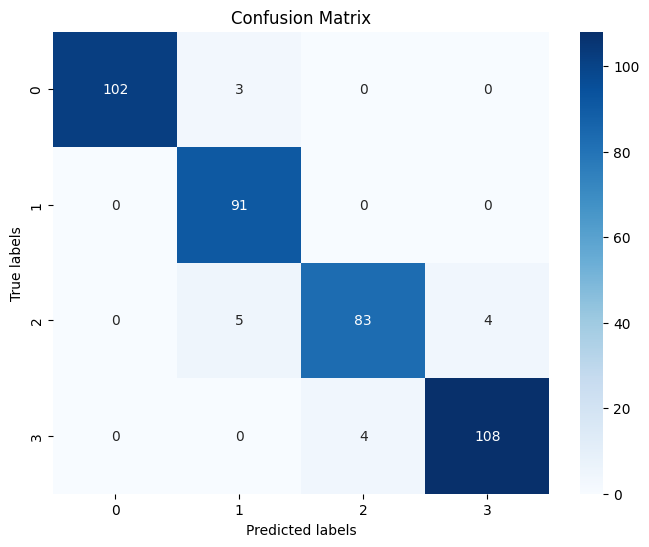

In [57]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Visualización de la Frontera de Decisión de SVM

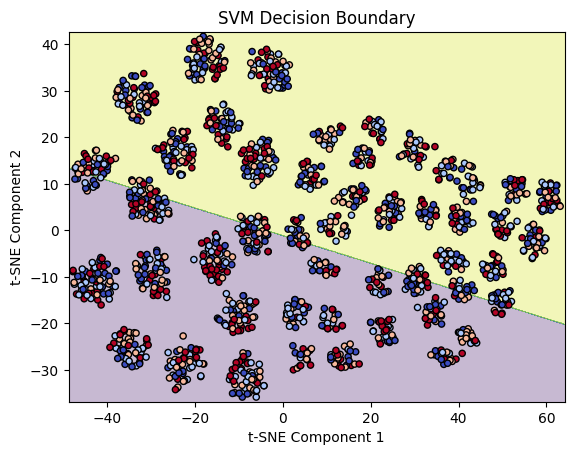

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.manifold import TSNE

# Aplicar t-SNE para reducir la dimensionalidad de las características en un problema de clasificación
tsne_cla = TSNE(n_components=2, random_state=42)
X_tsne_train = tsne_cla.fit_transform(X_train)
X_tsne_test = tsne_cla.fit_transform(X_test)  # Aplicar la misma transformación a los datos de prueba

# Crear y entrenar el modelo SVM para clasificación
svm_classifier_grafico2D = SVC(kernel='linear')
svm_classifier_grafico2D.fit(X_tsne_train, y_train)

# Crear una malla de puntos para visualizar la frontera de decisión
x_min, x_max = X_tsne_train[:, 0].min() - 1, X_tsne_train[:, 0].max() + 1
y_min, y_max = X_tsne_train[:, 1].min() - 1, X_tsne_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecir las clases para cada punto en la malla usando los datos de prueba transformados
Z = svm_classifier_grafico2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar la frontera de decisión junto con los puntos de datos
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_tsne_train[:, 0], X_tsne_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('SVM Decision Boundary')
plt.show()

DecisionTreeClassifier

In [30]:
#Uso de hiperparametros
#max_depth= 5
#min_samples_split= = 2
#min_samples_leaf= 1
#max_features= None  # None significa usar todas las características
#criterion= 'gini'  # Puedes cambiar a 'entropy' si prefieres la ganancia de información


model_dtc = DecisionTreeClassifier(criterion= 'gini',max_features= None,max_depth= 20)# usar hiperparametros minimo 2

model_dtc.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_dt = model_dtc.predict(X_test)

# Calcular las métricas
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Imprimir las métricas
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-score:", f1_dt)

Accuracy: 0.825
Precision: 0.829001712935928
Recall: 0.825
F1-score: 0.8250012900632393


RandomForestClassifier

In [36]:
#Hiperparametros

#n_estimators=100,
#max_depth=None,
#min_samples_split=2,
#min_samples_leaf=1,
#max_features='auto'

model_rf = RandomForestClassifier(n_estimators=1000,  max_features='log2',)# usar hiperparametros minimo 3

model_rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = model_dtc.predict(X_test)

# Calcular las métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Imprimir las métricas
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

Accuracy: 0.825
Precision: 0.829001712935928
Recall: 0.825
F1-score: 0.8250012900632393


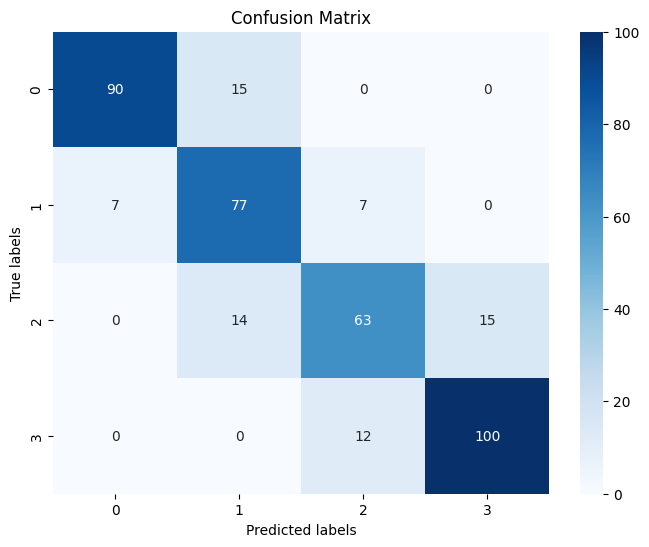

In [37]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Normalizar datos test

In [58]:
from sklearn.preprocessing import  MinMaxScaler
# Inicializar el codificador MinMaxScaler
scaler = MinMaxScaler()

# Lista de nombres de columnas numéricas
colum_num = ['battery_power', 'clock_speed', 'fc','int_memory','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']  # Puedes agregar las columnas numéricas que necesites normalizar

# Normalizar las columnas numéricas
df_test[colum_num] = scaler.fit_transform(df_test[colum_num])

In [59]:
df_test.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,0.362241,1,0.52,1,0.736842,0,0.048387,0.1,0.941667,...,0.8,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000,0,1,0
1,2,0.227485,1,0.00,1,0.210526,1,0.951613,0.8,0.925000,...,0.6,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778,1,0,0
2,3,0.871915,1,0.92,0,0.052632,0,0.403226,0.9,0.883333,...,0.2,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444,0,1,1
3,4,0.697799,0,0.00,1,0.947368,1,0.370968,0.5,0.133333,...,1.0,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778,1,1,0
4,5,0.623082,0,0.36,0,0.578947,1,0.758065,0.5,0.233333,...,0.9,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778,1,0,1


Prediccion con mi DataSetTest

In [60]:
X_data_test=df_test.drop(columns='id')
# Realizar predicciones en el conjunto de prueba
y_pred_test = svm_classifier.predict(X_data_test)

c:\Users\camil\Downloads\Clases\Tema2\venv_proyect_reto2\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [62]:
#Agregar una nueva columna con los resultados de mi modelo SVM
df_test['price_range']=y_pred_test

# Exportar el DataFrame modificado a un nuevo archivo CSV
ruta_out = './resultados_clasificacion_PricePhone.csv'

df_test.to_csv(ruta_out, index=False)  # No incluir índices en el archivo CSV

In [64]:
ruta_verification='./resultados_clasificacion_PricePhone.csv'
df_verification=pd.read_csv(ruta_verification)
df_verification.head(5)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,0.362241,1,0.52,1,0.736842,0,0.048387,0.1,0.941667,...,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000,0,1,0,3
1,2,0.227485,1,0.00,1,0.210526,1,0.951613,0.8,0.925000,...,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778,1,0,0,3
2,3,0.871915,1,0.92,0,0.052632,0,0.403226,0.9,0.883333,...,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444,0,1,1,2
3,4,0.697799,0,0.00,1,0.947368,1,0.370968,0.5,0.133333,...,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778,1,1,0,3
4,5,0.623082,0,0.36,0,0.578947,1,0.758065,0.5,0.233333,...,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778,1,0,1,1
